In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- $N$ = the number of donors in 6the registry
- $m$ = the probability of a match to at least one donor in the registry
- $p$ = the probability that there is a match to a randomly selected donor

We use this simple model $$m = 1 - (1-p)^N$$

In [2]:
def calc_p(m, N):
    return 1 - np.exp((np.log(1-m)/N))

In [3]:
def calc_m(p, N):
    return 1 - (1-p)**N

## Homogeneous registry 

Assume there are 160,000 Chinese (80% of 200,000) in the registry and that the overall probability of a match is 20% for a Chinese recipient.

In [4]:
N = 160_000
m = 0.2

In [5]:
p = calc_p(m, N)

In [6]:
p

1.3946462231739787e-06

What happens if we increase the size of the Chinese population in the registry?

In [7]:
res = np.array([(N, calc_m(p, N)) for N in range(150_000, 1_000_001, 50_000)]  )

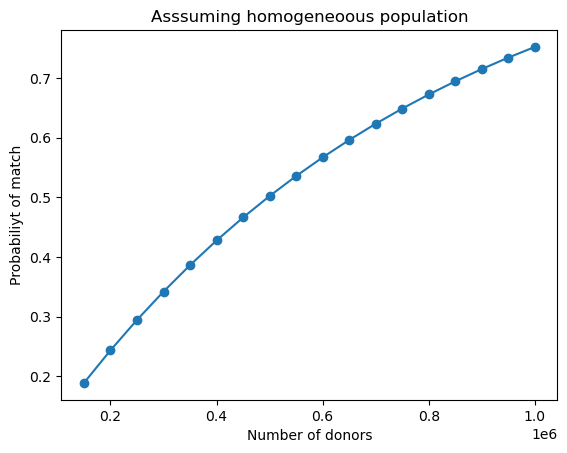

In [8]:
plt.plot(res[:, 0], res[:, 1], '-o')
plt.ylabel('Probabiliyt of match')
plt.xlabel('Number of donors')
plt.title('Asssuming homogeneoous population')
pass

## Heterogeneous registry

We make the following assumptions (obvioulsy with data, you can model more specific assumptions)

- Probabilyt of match if donor and recipient are the same race is the saem $p$ regardless of race
- Probabliyt of match if donor and recipient are from differnet reaces is $q \ll p$
    
Again, with data, you can get baseline values for $q_{d,r}$ where $d$ is donor race and $r$ is recipient race, but I don't have that information.

Assume that donor population is 80% Chinese, 15% Malay, and 5% Indian.

In [9]:
f_c = 0.8
f_m = 0.15
f_i = 0.05
N = 200_000
N_c = f_c * N
N_m = f_m * N
N_i = f_i * N

Probability of match for different races

- For illustration, I will just take $q = 0$ for Chinese and Indian, $q = 0$ for Indian and Malay and $q = 0.01p$ for Chinese and Malay, assuming symmetry

In [10]:
q_cm = 0.01 * p
q_ci = 0
q_mc = 0.01 * p
q_mi = 0
q_ic = 0
q_im = 0

Waht is probabilty of match for Chinese, Malay, or Indian recipient?

In [11]:
m_c = calc_m(p, N_c) + calc_m(q_cm, N_m) + calc_m(q_ci, N_i)
m_m = calc_m(p, N_m) + calc_m(q_mc, N_c) + calc_m(q_mi, N_i)
m_i = calc_m(p, N_i) + calc_m(q_ic, N_c) + calc_m(q_im, N_m)
pd.DataFrame([[m_c, m_m, m_i]], columns = ['Chinese', 'Malay', 'Inian'])

,Chinese,Malay,Inian
0,0.200418,0.043205,0.01385


Overall probability of match (in %) for a randomly selected recipeint

In [12]:
f'{(f_c * m_c + f_m * m_m + f_i * m_i):.2%}'

'16.75%'

### Targeted increases

Here we simulate what happens if you increase the size of one race in the donor registry. The results are quite intutive — the most cost-effective strattegy is to increase the size of the *majoriy* race if all you care about is increasing the total number of matched recipients.

If we increase Chinese in registry by 50_000

In [13]:
N_c_orig = N_c
N_c = N_c + 50_000

Probability of match for a specific race

In [15]:
m_c = calc_m(p, N_c) + calc_m(q_cm, N_m) + calc_m(q_ci, N_i)
m_m = calc_m(p, N_m) + calc_m(q_mc, N_c) + calc_m(q_mi, N_i)
m_i = calc_m(p, N_i) + calc_m(q_ic, N_c) + calc_m(q_im, N_m)
pd.DataFrame([[m_c, m_m, m_i]], columns = ['Chinese', 'Malay', 'Inian'])

,Chinese,Malay,Inian
0,0.254304,0.043901,0.01385


Overall probability of match (in %) for a randomly selected recipeint

In [16]:
f'{(f_c * m_c + f_m * m_m + f_i * m_i):.2%}'

'21.07%'

If we increaeee the Malay population by 50_000

In [17]:
N_c = N_c_orig
N_m_orig = N_m
N_m = N_m + 50_000

Probability of match for a specific race

In [18]:
m_c = calc_m(p, N_c) + calc_m(q_cm, N_m) + calc_m(q_ci, N_i)
m_m = calc_m(p, N_m) + calc_m(q_mc, N_c) + calc_m(q_mi, N_i)
m_i = calc_m(p, N_i) + calc_m(q_ic, N_c) + calc_m(q_im, N_m)
pd.DataFrame([[m_c, m_m, m_i]], columns = ['Chinese', 'Malay', 'Inian'])

,Chinese,Malay,Inian
0,0.201115,0.107802,0.01385


Overall probability of match (in %) for a randomly selected recipeint

In [19]:
f'{(f_c * m_c + f_m * m_m + f_i * m_i):.2%}'

'17.78%'

If we incrase the Indian population by 50_000

In [20]:
N_m = N_m_orig
N_i_orig = N_i
N_i = N_i + 50_000

In [21]:
m_c = calc_m(p, N_c) + calc_m(q_cm, N_m) + calc_m(q_ci, N_i)
m_m = calc_m(p, N_m) + calc_m(q_mc, N_c) + calc_m(q_mi, N_i)
m_i = calc_m(p, N_i) + calc_m(q_ic, N_c) + calc_m(q_im, N_m)
pd.DataFrame([[m_c, m_m, m_i]], columns = ['Chinese', 'Malay', 'Inian'])

,Chinese,Malay,Inian
0,0.200418,0.043205,0.080273


Overall probability of match (in %) for a randomly selected recipeint

In [22]:
f'{(f_c * m_c + f_m * m_m + f_i * m_i):.2%}'

'17.08%'